In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
sns.set(style="ticks")

In [2]:
ecommerce=pd.read_csv('2020-Jan.csv')
ecommerce.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,1005073,2232732093077520756,construction.tools.light,samsung,1130.02,519698804,69b5d72f-fd6e-4fed-aa23-1286b2ca89a0
1,2020-01-01 00:00:01 UTC,view,1005192,2232732093077520756,construction.tools.light,meizu,205.67,527767423,7f596032-ccbf-4643-9bad-e36a209512b4
2,2020-01-01 00:00:01 UTC,view,100063693,2053013552427434207,apparel.shirt,turtle,136.43,519046195,d1e2f343-84bb-49bd-b13d-ca0f1ed9910e
3,2020-01-01 00:00:01 UTC,view,5100816,2232732103831716449,apparel.shoes,xiaomi,29.95,518269232,0444841c-38ef-410c-b11f-7b35ea4e5991
4,2020-01-01 00:00:02 UTC,view,100014325,2232732103294845523,apparel.shoes.step_ins,intel,167.20,587748686,31b7d4cf-dfac-4895-9927-90fa3254f860
5,2020-01-01 00:00:02 UTC,view,16500026,2232732108713886406,apparel.costume,gamma,37.35,581037554,c161400e-630b-4b59-8797-d9b9714444bf
6,2020-01-01 00:00:02 UTC,view,1802026,2232732099754852875,appliances.personal.massager,samsung,576.33,581274910,44ca9bc7-3ba8-4546-bdf5-10b2172ed883
7,2020-01-01 00:00:02 UTC,view,11600004,2053013554834964853,appliances.kitchen.kettle,sven,43.48,595265136,32c08a07-f2d0-4da5-83fd-40ce97c651e6
8,2020-01-01 00:00:02 UTC,view,4802273,2232732079706079299,sport.bicycle,samsung,6.64,595414563,176fd102-7b61-4452-a0e5-f1f8cc9b4b95
9,2020-01-01 00:00:03 UTC,view,1005115,2232732093077520756,construction.tools.light,apple,869.46,531140669,84c838d4-6e10-4b7d-8d29-90749e577a6b


In [3]:
#Eliminamos las columnas random
ecommerce_limpio=ecommerce.drop(['product_id', 'category_id', 'user_id', 'user_session'], axis=1)
ecommerce_limpio

,event_time,event_type,category_code,brand,price
0,2020-01-01 00:00:00 UTC,view,construction.tools.light,samsung,1130.02
1,2020-01-01 00:00:01 UTC,view,construction.tools.light,meizu,205.67
2,2020-01-01 00:00:01 UTC,view,apparel.shirt,turtle,136.43
3,2020-01-01 00:00:01 UTC,view,apparel.shoes,xiaomi,29.95
4,2020-01-01 00:00:02 UTC,view,apparel.shoes.step_ins,intel,167.20
...,...,...,...,...,...
55967036,2020-01-31 23:59:59 UTC,view,apparel.shoes,xiaomi,33.72
55967037,2020-01-31 23:59:59 UTC,view,construction.tools.light,xiaomi,228.83
55967038,2020-01-31 23:59:59 UTC,view,apparel.shoes,respect,47.36
55967039,2020-01-31 23:59:59 UTC,view,furniture.bedroom.blanket,midea,51.30


In [4]:
#Eliminamos las filas con valores nulos (NaN)
ecommerce_limpio_nan = ecommerce_limpio.dropna()
ecommerce_limpio_nan

,event_time,event_type,category_code,brand,price
0,2020-01-01 00:00:00 UTC,view,construction.tools.light,samsung,1130.02
1,2020-01-01 00:00:01 UTC,view,construction.tools.light,meizu,205.67
2,2020-01-01 00:00:01 UTC,view,apparel.shirt,turtle,136.43
3,2020-01-01 00:00:01 UTC,view,apparel.shoes,xiaomi,29.95
4,2020-01-01 00:00:02 UTC,view,apparel.shoes.step_ins,intel,167.20
...,...,...,...,...,...
55967036,2020-01-31 23:59:59 UTC,view,apparel.shoes,xiaomi,33.72
55967037,2020-01-31 23:59:59 UTC,view,construction.tools.light,xiaomi,228.83
55967038,2020-01-31 23:59:59 UTC,view,apparel.shoes,respect,47.36
55967039,2020-01-31 23:59:59 UTC,view,furniture.bedroom.blanket,midea,51.30


# PRODUCTOS MAS COMPRADOS

In [6]:
compras = ecommerce_limpio_nan['event_type'] == 'purchase'
df_compras = ecommerce_limpio_nan[compras]

In [7]:
x = df_compras.category_code
productos_vendidos = Counter(x)

In [11]:
# convert the dictionary to a DataFrame
df_productos_vendidos = pd.DataFrame.from_dict(productos_vendidos, orient='index')
#Y ordenamos.
df_productos_vendidos = df_productos_vendidos[0].sort_values(ascending = False)
df_productos_vendidos.head(20)

construction.tools.light             405224
sport.bicycle                         41300
appliances.personal.massager          28661
apparel.shoes                         22693
electronics.clocks                    21859
appliances.kitchen.refrigerators      20061
electronics.audio.headphone           16476
appliances.environment.vacuum         13736
appliances.kitchen.washer             13241
appliances.kitchen.coffee_grinder      9049
apparel.shoes.slipons                  6833
furniture.bedroom.blanket              6765
computers.peripherals.printer          5807
apparel.shoes.keds                     4545
apparel.shoes.sandals                  4078
kids.toys                              3999
electronics.camera.video               3859
apparel.costume                        3583
electronics.smartphone                 3370
furniture.kitchen.table                3346
Name: 0, dtype: int64

Text(0.5, 1.0, '10 productos más vendidos')

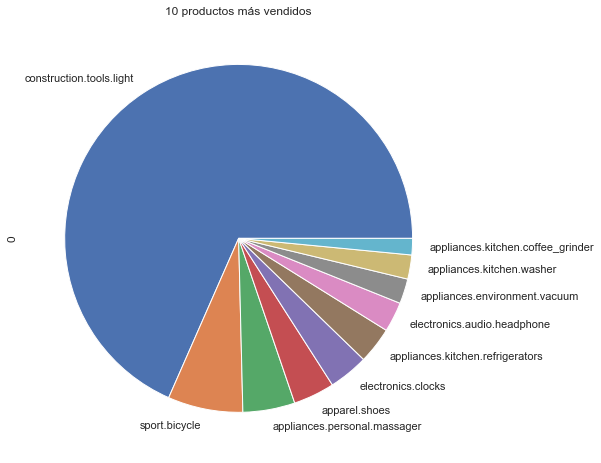

In [9]:
df_productos_vendidos.head(10).plot(kind='pie', subplots=True, figsize=(16,8))
plt.title("10 productos más vendidos")

In [10]:
df_productos_vendidos.tail(20)

furniture.bathroom.toilet              56
furniture.bedroom.pillow               50
appliances.environment.water_heater    47
auto.accessories.parktronic            46
computers.components.motherboard       42
appliances.kitchen.coffee_machine      42
computers.peripherals.camera           41
furniture.living_room.shelving         41
appliances.kitchen.fryer               40
sport.diving                           36
computers.components.hdd               35
appliances.environment.fan             26
computers.components.sound_card        21
computers.peripherals.keyboard         18
apparel.jacket                         18
apparel.skirt                          12
appliances.kitchen.microwave           11
apparel.belt                            2
construction.tools.soldering            2
auto.accessories.light                  1
Name: 0, dtype: int64

Text(0.5, 1.0, '10 productos menos vendidos')

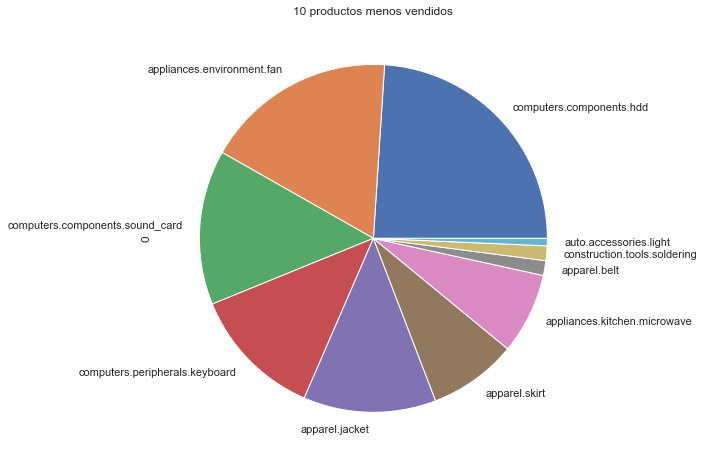

In [12]:
df_productos_vendidos.tail(10).plot(kind='pie', subplots=True, figsize=(16,8))
plt.title("10 productos menos vendidos")

# Horas y días en cuanto a COMPRAS

In [14]:
#DataFrame SÓLO con compras (purchase) CON valores nulos.
compras_nan = ecommerce_limpio['event_type'] == 'purchase'
df_compras_nan = ecommerce_limpio[compras_nan]

In [16]:
#DataFrame SÓLO con visualizaciones (views)
visualizaciones = ecommerce_limpio['event_type'] == 'view'
df_visualizaciones = ecommerce_limpio[visualizaciones]

In [17]:
df_compras_nan['event_time'] = df_compras_nan['event_time'].str.slice_replace(19, 24, '')

C:\Users\fran2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_compras_nan['event_time']=pd.to_datetime(df_compras_nan['event_time'])

C:\Users\fran2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_compras_nan.set_index('event_time', inplace=True)

In [20]:
dias=df_compras_nan.resample('d').count()

In [21]:
dias['index1'] = dias.index

In [22]:
z=dias.groupby([dias.index.day]).mean()

In [23]:
z['index1'] = z.index

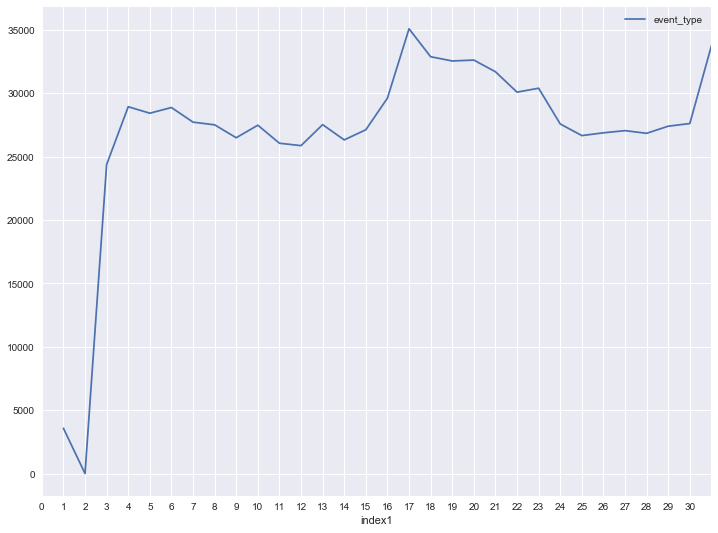

In [24]:
plt.style.use('seaborn')
z.plot(x='index1', y='event_type', kind = 'line', figsize=(12,9))
plt.xticks(np.arange(0,31,1))
plt.show()

# COMPRAS HORAS

In [25]:
df_compras_horas=df_compras_nan.resample('h').count()

In [26]:
x2=df_compras_horas.groupby([df_compras_horas.index.hour]).mean()

In [27]:
x2['index1'] = x2.index

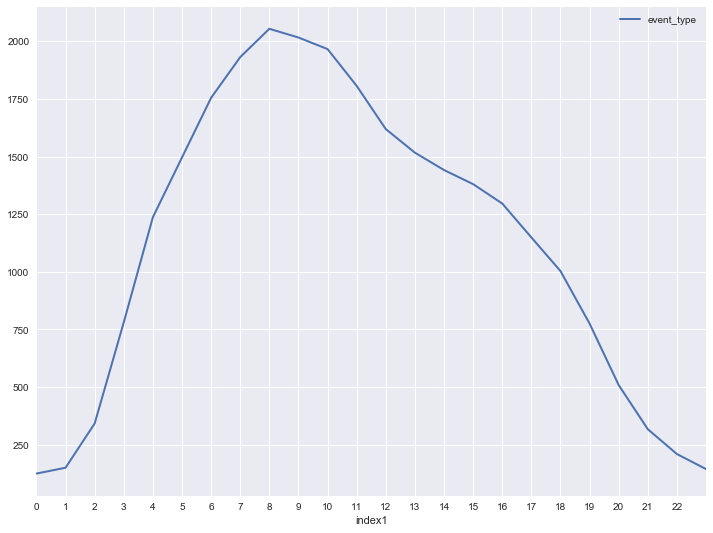

In [28]:
plt.style.use('seaborn')
x2.plot(x='index1', y='event_type', kind = 'line', figsize=(12,9), linewidth=2 )
plt.xticks(np.arange(0,23,1))
plt.show()

# DIAS  VISUALIZACIONES

In [29]:
df_visualizaciones['event_time'] = df_visualizaciones['event_time'].str.slice_replace(19, 24, '')

C:\Users\fran2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_visualizaciones['event_time']=pd.to_datetime(df_visualizaciones['event_time'])

C:\Users\fran2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_visualizaciones.set_index('event_time', inplace=True)

In [32]:
dias_visualizaciones=df_visualizaciones.resample('d').count()

In [33]:
dias_visualizaciones['index1'] = dias_visualizaciones.index

In [34]:
y=dias_visualizaciones.groupby([dias_visualizaciones.index.day]).mean()

In [35]:
y['index1'] = y.index

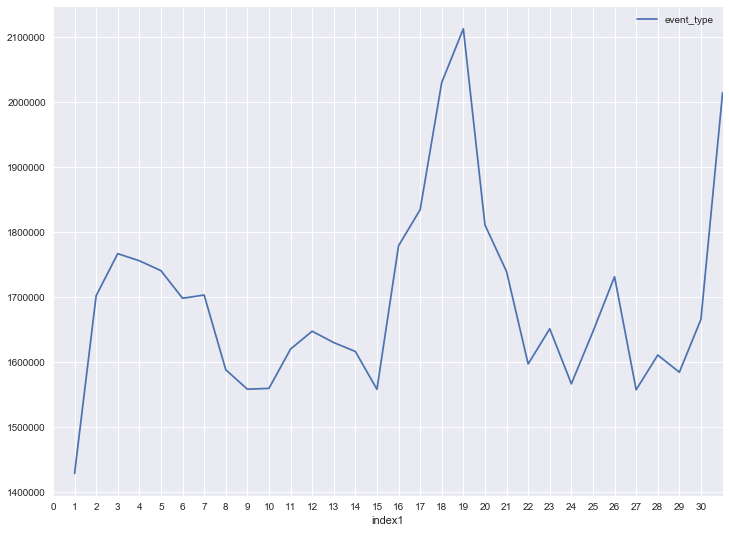

In [36]:
plt.style.use('seaborn')
y.plot(x='index1', y='event_type', kind = 'line', figsize=(12,9))
plt.xticks(np.arange(0,31,1))
plt.show()

# HORAS VISUALIZACIONES

In [37]:
df_quitar_dias=df_visualizaciones

In [38]:
df_quitar_dias=df_quitar_dias.resample('h').count()

In [39]:
x=df_quitar_dias.groupby([df_quitar_dias.index.hour]).mean()

In [40]:
x['index1'] = x.index

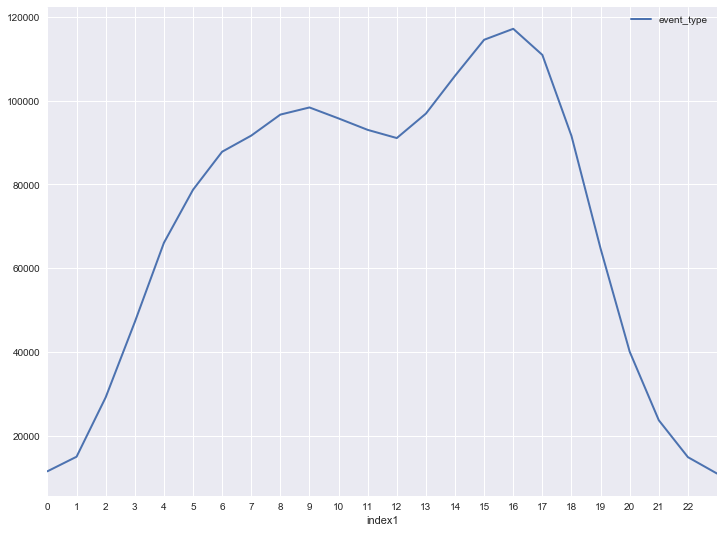

In [41]:
plt.style.use('seaborn')
x.plot(x='index1', y='event_type', kind = 'line', figsize=(12,9), linewidth=2 )
plt.xticks(np.arange(0,23,1))
plt.show()